In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import glob

In [3]:
#모델 이미지
imgFile ="model.jpg"

# 마우스 이벤트 및 도형그리기

In [4]:
drawing = False  # True 이면 마우스가 눌린 상태입니다.
mode = True  # True이면 사각형을 그립니다. 'm'을 누르면 곡선으로 변경(토글)됩니다 
oldx, oldy, width, height = 10,10,10,10 

# 마우스 콜백 함수
def mouse_callback(event, x, y, flags, param):
    global oldx, oldy, width, height # 함수가 종료되더라도 전역변수처럼 값이 유지된다
    
    # 마우스 왼쪽버튼 누른경우
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
    
    # 마우스 이동중인 경우
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON: # ==를 쓰면 다른 키도 입력되었을 때 작동안하므로 &(and) 사용
            img = cv2.imread(imgFile)  # 원본이미지를 호출함으로서 그렸던 도형자국을 지운다
            cv2.rectangle(img, (oldx, oldy), (x, y), (0, 255, 0), 1)
            #cv2.rectangle(img, (oldx, oldy), (x, y), (0, 255, 0), -1) # 사각형안을 채워 그리기
            cv2.imshow('image', img)

    # 마우스 버튼을 올린경우
    elif event == cv2.EVENT_LBUTTONUP:
        width, height = (x-oldx), (y-oldy)
        print('EVENT_LBUTTONUP: %d, %d, %d, %d' % (oldx, oldy, width, height)) # 좌표 출력

        


# Trim 영역설정

In [5]:
img = cv2.imread(imgFile) 
cv2.namedWindow('image')
cv2.setMouseCallback('image',mouse_callback, img)



# 영상 출력
cv2.imshow('image', img)

cv2.waitKey()
print('return: %d, %d, %d, %d' % (oldx, oldy, width, height)) # 좌표 출력

cv2.destroyAllWindows()

EVENT_LBUTTONUP: 656, 176, 109, 141
return: 656, 176, 109, 141


# 모델 이미지 자르기

In [6]:
def im_trim (img, trimName):    
    #print('ROI: %d, %d, %d, %d' % (oldx, oldy, width, height)) # 좌표 출력
    img_trim = img[oldy: oldy+ height, oldx: oldx+width]
    cv2.imwrite(trimName + ".jpg", img_trim)
    #print(trimName + ".jpg")
    return img_trim

In [7]:
org_img = cv2.imread(imgFile) # 원본이미지 입력
trim_img = im_trim(org_img, "trim_model")

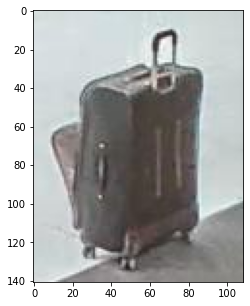

In [8]:
# 검사모습보기
fig = plt.figure(figsize=(5,5))
plt.imshow(trim_img)         
plt.grid(False)
plt.show()

In [9]:
filelist = glob.glob("D:\\Image\\aaa\\*")
trimImg_path = "D:\\Image\\bbb\\" 



for files in filelist:
    org_img_1 = cv2.imread(files)
    wfileName = os.path.basename(files)
    wfileName = wfileName[:wfileName.rfind('.')] 
    im_trim(org_img_1, trimImg_path+wfileName)    



In [10]:
filelist2 = glob.glob("D:\\Image\\bbb\\*")
pgmfile_path = "D:\\Image\\ccc\\"

for files in filelist2:
    #print(os.path.basename(files))
 	wfileName = os.path.basename(files)
 	wfileName = wfileName[:wfileName.rfind('.')]
 	img = cv2.imread(files, 0)
    #print(pgmfile_path+wfileName)
 	cv2.imwrite(pgmfile_path+wfileName+".pgm",img)
#     print(pgmfile_path+wfileName+".pgm")